In [191]:
import pandas as pd
from datetime import timedelta

In [185]:
df = pd.read_csv('output/output.csv')
df["timestamp"] = pd.to_datetime(
    df["timestamp"],
    format="%m-%d-%Y %H:%M:%S"
)

In [186]:
df2 = df.pivot_table(index='timestamp', columns='common_name', values='confidence')
df2.columns.name = None
df2 = (df2.fillna(0) >= 0.1).astype(int)
# df2 = df2.reset_index()


In [187]:
df2 = df2.drop(columns=df2.columns[(df2 == 0).all()])


In [ ]:
meaned = df2.groupby(pd.Grouper(freq='1min')).mean()
meaned = (meaned.fillna(0) >= 0.5).astype(int)
q15 = meaned.groupby(pd.Grouper(freq='5min')).sum().reset_index()
hourly = meaned.groupby(pd.Grouper(freq='h')).sum().reset_index()
hourly = hourly[hourly["timestamp"]>hourly["timestamp"].max() - timedelta(hours=24)]
daily = meaned.groupby(pd.Grouper(freq='D')).sum().reset_index()
weekly = meaned.groupby(pd.Grouper(freq='W')).sum().reset_index()
monthly = meaned.groupby(pd.Grouper(freq='ME')).sum().reset_index()
yearly = meaned.groupby(pd.Grouper(freq='YE')).sum().reset_index()




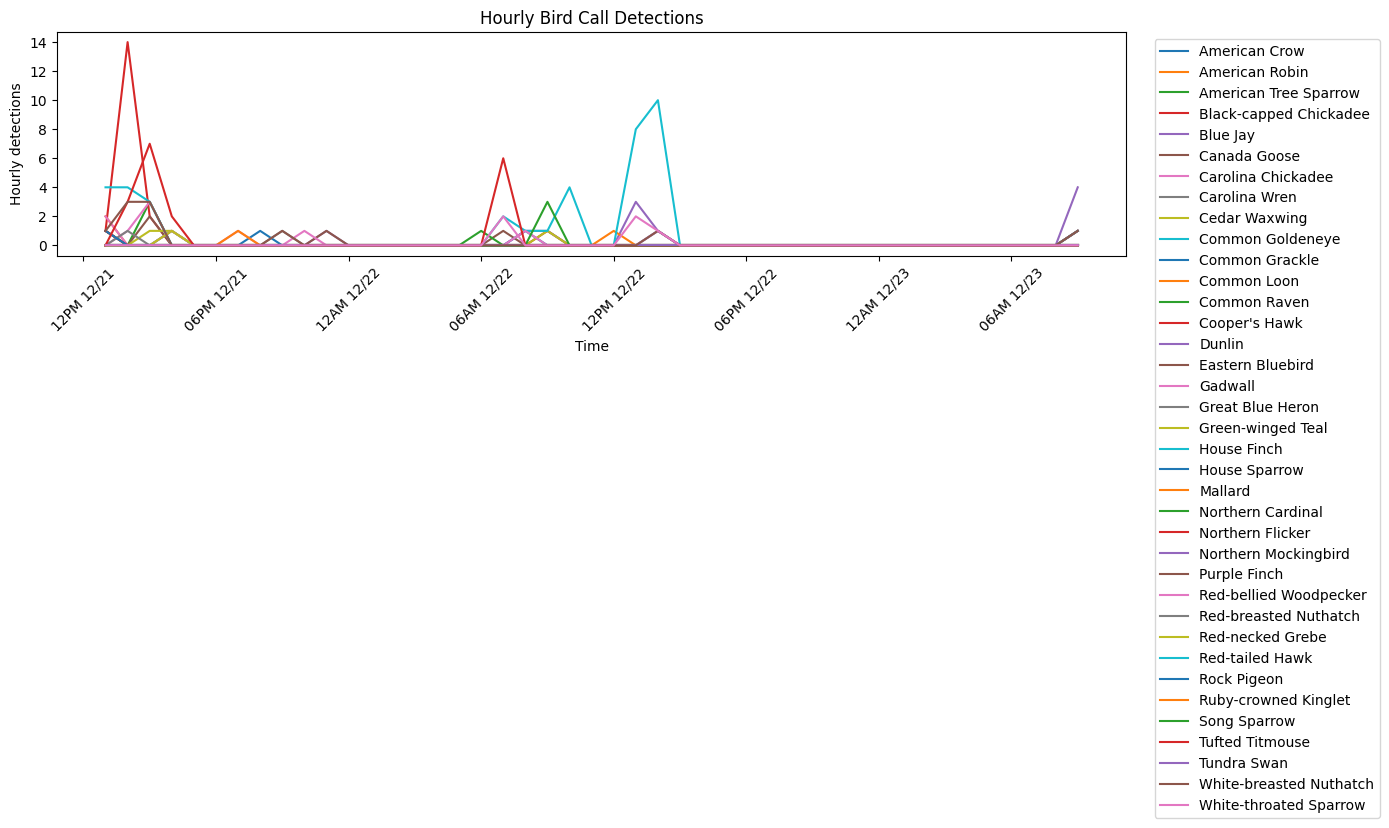

In [194]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

for col in hourly.columns:
    plt.plot(hourly.index, hourly[col], label=col)

plt.xlabel("Time")
plt.ylabel("Hourly detections")
plt.title("Hourly Bird Call Detections")

# Format x-axis: 12-hour time with am/pm + mm/dd
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%I%p %m/%d'))

# Optional: rotate labels for readability
plt.xticks(rotation=45)

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()
